# Linear Regression

In this module, we train a linear model to make predictions on artificial data using two different methods:

1. Using the Normal Equation to find the value of $\theta$ that minimizes the Mean Squared Error (MSE). 
2. Using the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from Sklearn. 

### Definitions:
We have the following parameters:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $M$ is the number of target values
- $\{x_1, x_2, ..., x_n\}$ are the features
- $\theta_1, ..., \theta_n$ are the feature weights
- $\theta_0$ is the bias term.

The linear regression model's prediction is: $\hat{y} = \theta \cdot \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n.$

__The Mean Squared Error__:
$$ MSE(X, y, \theta) = \frac{1}{M} \sum_{i = 1}^M (\theta^{\top} x^{(i)} - y^{(i)})^2. $$


__The Normal Equation__: 

The value, $\hat{\theta}$, which minimizes the MSE is:
$$ \hat{\theta} = (X^{\top} X)^{-1} X^{\top} y. $$


The artifical data will be taken from sklearn using [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression). 

---

The following packages are required to run the attached code:
- [Numpy]()
- [Matplotlib.pyplot]()
- [Sklearn.linear_model]()

In [13]:
# import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [14]:
# generate a random regression problem (i.e. the artificial data)
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=42)

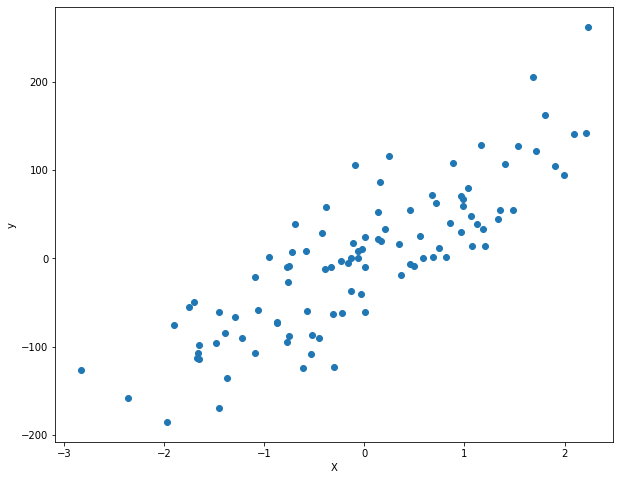

In [15]:
# visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()
plt.ion()

In [16]:
# define our theta function
def theta(X, y):
    normal_eqn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return normal_eqn

In [17]:
X_update = np.c_[np.ones((100,1)), X]
theta = theta(X_update, y)
theta

array([ 1.03722852, 63.20981521])

In [18]:
# generate the predicted value 
X_range = np.array([[-2],[2]])
X_range_update = np.c_[np.ones((2,1)), X_range]
y_predict = X_range_update.dot(theta)
y_predict

array([-125.3824019 ,  127.45685894])

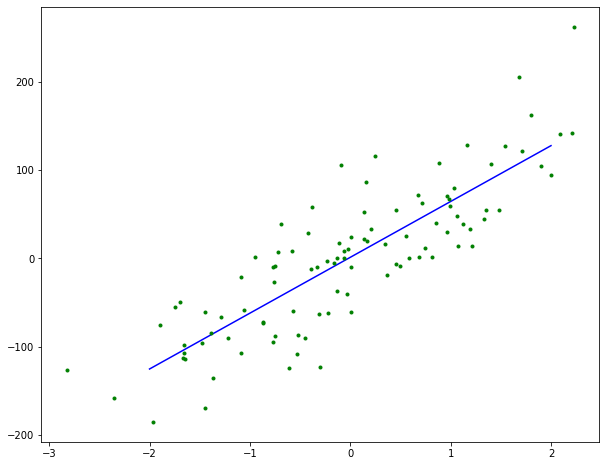

In [19]:
# plot the predicted data
plt.figure(figsize=(10, 8))
plt.plot(X_range, y_predict, "b-")
plt.plot(X, y, "g.")
plt.axis()
plt.show()

---

Now, we use the LinearRegression class from Sklearn.

---

In [20]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
model.coef_ = model.coef_.astype(float)
y_predict_LR = model.predict(X_range)

print(f'theta = {model.intercept_, model.coef_}')
print(f'predicted y = {y_predict_LR}')

theta = (1.0372285206061416, array([63.20981521]))
predicted y = [-125.3824019   127.45685894]


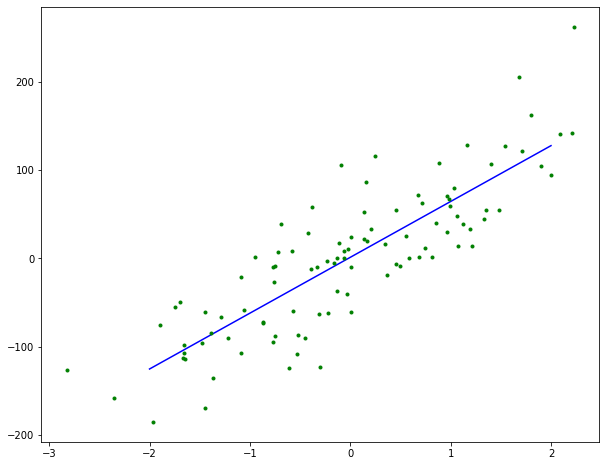

In [21]:
# plot the predicted data 
plt.figure(figsize=(10, 8))
plt.plot(X_range, y_predict_LR, "b-")
plt.plot(X, y, "g.")
plt.axis()
plt.show()

---

Note that both methods yield the same values for $\theta$ and $\hat{y}$! 

---